In [21]:
import pandas as pd
# SST Data set import and considered the nd values as na or missing
df1 = pd.read_csv("https://github.com/Feba01/Dissertation/raw/refs/heads/main/global_bleaching_environmental.csv", na_values=["nd"])

In [30]:
# GLODAP datset import
df2 = pd.read_csv("https://github.com/Feba01/Dissertation/raw/refs/heads/main/GLODAPv2.2023_Merged_Master_File.csv", na_values=[-9999])

<ipython-input-30-3333468859>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("https://github.com/Feba01/Dissertation/raw/refs/heads/main/GLODAPv2.2023_Merged_Master_File.csv", na_values=[-9999])


In [67]:
len(df1)

41361

In [68]:
len(df2)

1402829

In [69]:
column_names = df1.columns.tolist()
print(column_names)

['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees', 'Longitude_Degrees', 'Ocean_Name', 'Reef_ID', 'Realm_Name', 'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name', 'City_Town_Name', 'Site_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year', 'Depth_m', 'Substrate_Name', 'Percent_Cover', 'Bleaching_Level', 'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW

In [22]:
columns_to_drop = [
    'Bleaching_Comments',
    'Bleaching_Level',
    'Percent_Cover',
    'Reef_ID',
    'Sample_Comments',
    'Site_Comments',
    'Site_Name',
    'Substrate_Name'
]

# Drop the columns (ignore errors if some columns don't exist)
df1 = df1.drop(columns=columns_to_drop, errors='ignore')

In [71]:
column_names = df1.columns.tolist()
print(column_names)

['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees', 'Longitude_Degrees', 'Ocean_Name', 'Realm_Name', 'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name', 'City_Town_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year', 'Depth_m', 'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 'Date']


In [72]:
# Missing values in df1
pd.set_option('display.max_rows', None)

df1.isna().sum()

,0
Site_ID,0
Sample_ID,0
Data_Source,0
Latitude_Degrees,0
Longitude_Degrees,0
Ocean_Name,0
Realm_Name,0
Ecoregion_Name,3
Country_Name,1
State_Island_Province_Name,99


In [73]:
#Remaining rows after dropping rows with nd
remaining_rows = df1.dropna().shape[0]
print("Number of rows remaining after dropping missing values:", remaining_rows)

Number of rows remaining after dropping missing values: 31799


In [23]:
df1['Country_Name'] = df1['Country_Name'].fillna('Unknown')
df1['State_Island_Province_Name'] = df1['State_Island_Province_Name'].fillna('Unknown')
df1['City_Town_Name'] = df1['City_Town_Name'].fillna('Unknown')
df1['Ecoregion_Name'] = df1['Ecoregion_Name'].fillna('Unknown')

print("Imputation done. Missing values remaining in these columns:")
print(df1[['Country_Name', 'State_Island_Province_Name', 'City_Town_Name', 'Ecoregion_Name']].isnull().sum())

Imputation done. Missing values remaining in these columns:
Country_Name                  0
State_Island_Province_Name    0
City_Town_Name                0
Ecoregion_Name                0
dtype: int64


In [75]:
# Columns you want to exclude from the null check
exclude_cols = [
    "Percent_Bleaching",
    "Temperature_Kelvin", "Temperature_Minimum", "Temperature_Kelvin_Standard_Deviation",
    "Temperature_Maximum", "Temperature_Mean", "SSTA_FrequencyMean",
    "SSTA_DHW_Standard_Deviation", "TSA_Mean", "TSA_DHW_Standard_Deviation",
    "TSA_Frequency_Standard_Deviation", "TSA_FrequencyMax", "SSTA_DHWMean",
    "TSA_Standard_Deviation", "TSA_Minimum", "TSA_Maximum", "SSTA_DHWMax",
    "TSA_DHWMean", "TSA_FrequencyMean"
]

# Columns to check for nulls
cols_to_check = [col for col in df1.columns if col not in exclude_cols]

# Drop rows where any of these columns have nulls
df_no_nulls = df1.dropna(subset=cols_to_check)

# Print number of remaining rows
print(f"Number of rows remaining after dropping rows with nulls (excluding specified columns): {df_no_nulls.shape[0]}")

Number of rows remaining after dropping rows with nulls (excluding specified columns): 39375


In [77]:
!pip install missingno

<Figure size 2000x800 with 0 Axes>

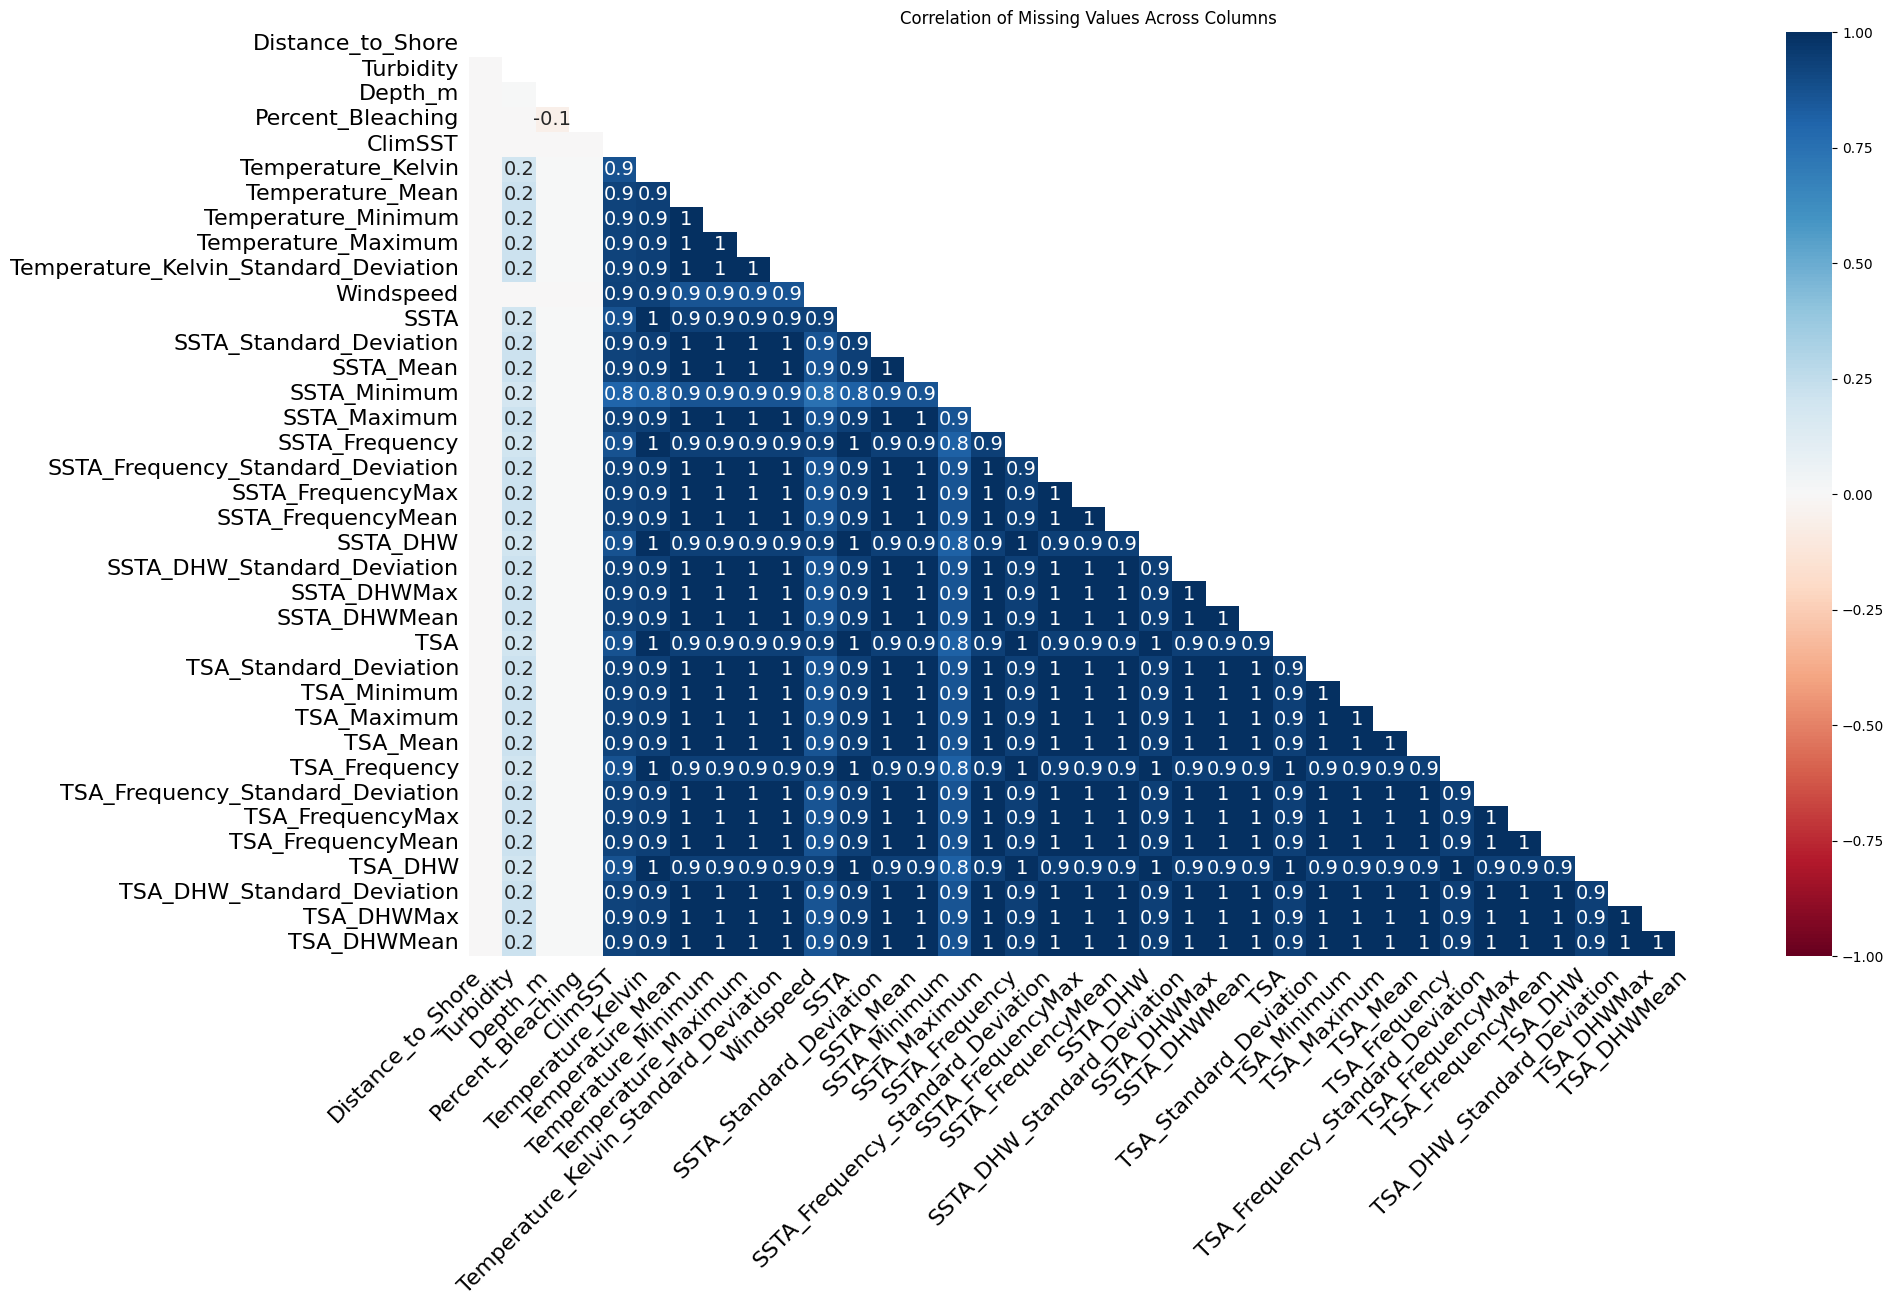

In [78]:
import missingno as msno
import matplotlib.pyplot as plt
# Heatmap (Correlation of Missing Data)
plt.figure(figsize=(20, 8))
msno.heatmap(df1)
plt.title("Correlation of Missing Values Across Columns")
plt.show()

There is no correlation between the missing values in the Target Variable column (Percent_Bleaching) and the other columns. Hence normal imputation will be performed for the column.

In [79]:
missing_percent = df1.isna().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0])

Percent_Bleaching                        0.165530
Depth_m                                  0.043498
SSTA_Minimum                             0.004256
Temperature_Kelvin                       0.003579
SSTA                                     0.003579
SSTA_Frequency                           0.003579
SSTA_DHW                                 0.003579
TSA                                      0.003579
TSA_DHW                                  0.003579
TSA_Frequency                            0.003579
Temperature_Minimum                      0.003192
SSTA_Standard_Deviation                  0.003192
SSTA_Mean                                0.003192
SSTA_Frequency_Standard_Deviation        0.003192
Temperature_Kelvin_Standard_Deviation    0.003192
Temperature_Maximum                      0.003192
Temperature_Mean                         0.003192
SSTA_FrequencyMean                       0.003192
SSTA_Maximum                             0.003192
SSTA_FrequencyMax                        0.003192


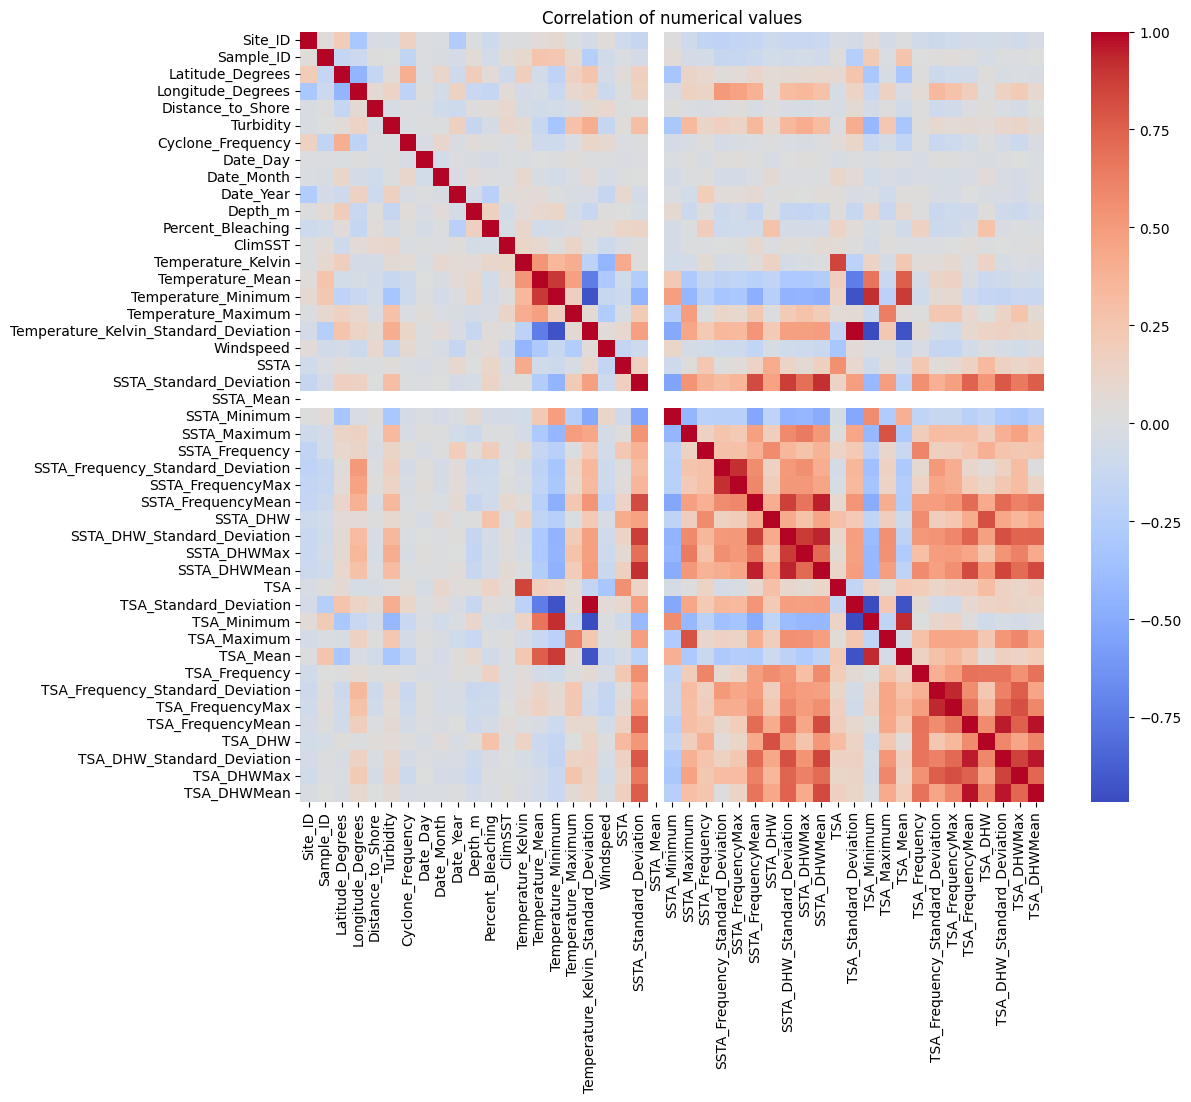

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
numerical_cols = df1.select_dtypes(include=['number']).columns.tolist()
sns.heatmap(df1[numerical_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation of numerical values")
plt.show()

In [81]:
print(df1[numerical_cols].corr())

                                        Site_ID  Sample_ID  Latitude_Degrees  \
Site_ID                                1.000000   0.040110          0.206075   
Sample_ID                              0.040110   1.000000         -0.145538   
Latitude_Degrees                       0.206075  -0.145538          1.000000   
Longitude_Degrees                     -0.299669  -0.109336         -0.437344   
Distance_to_Shore                     -0.016812   0.021430         -0.148568   
Turbidity                             -0.026529   0.015369          0.047299   
Cyclone_Frequency                      0.154459  -0.173232          0.394529   
Date_Day                              -0.000365   0.001476         -0.006903   
Date_Month                            -0.011117  -0.021793          0.117852   
Date_Year                             -0.259441  -0.048486         -0.083625   
Depth_m                                0.007418   0.061170          0.190194   
Percent_Bleaching                     -0

As the target variable's missingness is MCAR although it's missing data perc is more than 5%, it's null value rows will be dropped as it's missigness is MCAR

In [24]:
df1 = df1.dropna(subset=['Percent_Bleaching'])
print(len(df1))

34515


As the variables Depth_m, Distance_to_Shore and ClimSST have missigness that is MCAR and the data that is missing is less than 5% of the data currently in the dataset, the rows with their missing values will also be dropped.

In [25]:
df1 = df1.dropna(subset=['Depth_m', 'Distance_to_Shore', 'ClimSST'])
print(len(df1))

32737


In [84]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

def mice_impute_selected(df, numerical_cols, exclude_cols):
    df_result = df1.copy()

    # Columns to impute
    impute_cols = [col for col in numerical_cols if col not in exclude_cols]

    # Mask 5% for RMSE validation
    np.random.seed(0)
    mask_matrix = df_result[impute_cols].notnull() & (np.random.rand(*df_result[impute_cols].shape) < 0.05)
    df_masked = df_result.copy()
    df_masked[impute_cols] = df_masked[impute_cols].mask(mask_matrix)
    ground_truth = df_result[impute_cols].copy()

    # Apply MICE
    mice = IterativeImputer(random_state=0, max_iter=20)
    df_masked[impute_cols] = mice.fit_transform(df_masked[impute_cols])
    print(f"MICE imputation applied to: {impute_cols}")

    # Compute RMSE
    rmse_results = {}
    for col in impute_cols:
        mask = mask_matrix[col].values
        if mask.sum() > 0:
            rmse = np.sqrt(mean_squared_error(ground_truth[col][mask], df_masked[col][mask]))
            std_dev = ground_truth[col].std()
            relative_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
            rmse_results[col] = {
                'RMSE': rmse,
                'StdDev': std_dev,
                'Relative_RMSE (%)': relative_rmse
            }

    rmse_df = pd.DataFrame(rmse_results).T
    print("\nRMSE, StdDev, and Relative RMSE (% of std dev):")
    print(rmse_df)

    return df_masked, rmse_df

  # Identify numerical columns
numerical_cols = ['ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean']

# Define exclusions
exclude_cols = ["Distance_to_Shore", "Depth_m", "Turbidity", "Percent_Bleaching"]

# Run imputer
df1_imputed, rmse_df = mice_impute_selected(df1, numerical_cols, exclude_cols)


MICE imputation applied to: ['ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean']

RMSE, StdDev, and Relative RMSE (% of std dev):
                                            RMSE     StdDev  Relative_RMSE (%)
ClimSST                                14.362047  14.945487          96.096217
Temperature_Kelvin                      0.269802   1.995259          13.522173
Temperature_Mean                        0

In [85]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def hybrid_impute(df, numerical_cols, poorly_predictable_cols, n_neighbors=5):
    df_result = df.copy()
    rmse_results = {}

    #  Mask some values for RMSE validation
    np.random.seed(0)
    mask_matrix = df_result[numerical_cols].notnull() & (np.random.rand(*df_result[numerical_cols].shape) < 0.05)
    df_masked = df_result.copy()
    df_masked[numerical_cols] = df_masked[numerical_cols].mask(mask_matrix)
    ground_truth = df_result[numerical_cols].copy()

    #  Simple imputation for poorly predictable cols
    for col in poorly_predictable_cols:
        if col in df_masked.columns:
            median_val = df_masked[col].median()
            df_masked[col] = df_masked[col].fillna(median_val)
            print(f" Simple imputation applied to '{col}' (median = {median_val:.4f})")

            # RMSE evaluation
            mask = mask_matrix[col].values
            if mask.sum() > 0:
                rmse = np.sqrt(mean_squared_error(ground_truth[col][mask], df_masked[col][mask]))
                std_dev = ground_truth[col].std()
                relative_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
                rmse_results[col] = {
                    'RMSE': rmse,
                    'StdDev': std_dev,
                    'Relative_RMSE (%)': relative_rmse
                }

    #  MICE for the rest
    mice_cols = [col for col in numerical_cols if col not in poorly_predictable_cols]
    if mice_cols:
        mice_imputer = IterativeImputer(random_state=0, max_iter=10)
        df_masked[mice_cols] = mice_imputer.fit_transform(df_masked[mice_cols])
        print(f" MICE imputation applied to: {mice_cols}")

        # RMSE evaluation
        for col in mice_cols:
            mask = mask_matrix[col].values
            if mask.sum() > 0:
                rmse = np.sqrt(mean_squared_error(ground_truth[col][mask], df_masked[col][mask]))
                std_dev = ground_truth[col].std()
                relative_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
                rmse_results[col] = {
                    'RMSE': rmse,
                    'StdDev': std_dev,
                    'Relative_RMSE (%)': relative_rmse
                }

    # Create RMSE summary DataFrame
    rmse_df = pd.DataFrame(rmse_results).T
    print("\n RMSE, StdDev, and Relative RMSE (% of std dev):\n")
    print(rmse_df)

    return df_masked, rmse_df


In [86]:
# Define your numerical columns and poorly predictable columns
numerical_cols = [
    "Percent_Bleaching", "Depth_m", "Turbidity", "Distance_to_Shore",
    "SSTA_Minimum", "Temperature_Kelvin", "SSTA", "SSTA_Frequency",
    "SSTA_DHW", "TSA", "TSA_DHW", "TSA_Frequency",
    "Temperature_Minimum", "SSTA_Standard_Deviation", "SSTA_Mean",
    "SSTA_Frequency_Standard_Deviation", "Temperature_Kelvin_Standard_Deviation",
    "Temperature_Maximum", "Temperature_Mean", "SSTA_FrequencyMean", "SSTA_Maximum",
    "SSTA_FrequencyMax", "SSTA_DHW_Standard_Deviation", "TSA_Mean",
    "TSA_DHW_Standard_Deviation", "TSA_Frequency_Standard_Deviation", "TSA_FrequencyMax",
    "SSTA_DHWMean", "TSA_Standard_Deviation", "TSA_Minimum", "TSA_Maximum",
    "SSTA_DHWMax", "TSA_DHWMean", "TSA_DHWMax", "TSA_FrequencyMean",
    "Windspeed", "ClimSST"
]

poorly_predictable_cols = ["Percent_Bleaching", "Depth_m", "Turbidity", "Distance_to_Shore"]

df1_imputed, rmse_df = hybrid_impute(df1, numerical_cols, poorly_predictable_cols)

 Simple imputation applied to 'Percent_Bleaching' (median = 0.0000)
 Simple imputation applied to 'Depth_m' (median = 6.0000)
 Simple imputation applied to 'Turbidity' (median = 0.0568)
 Simple imputation applied to 'Distance_to_Shore' (median = 449.2800)
 MICE imputation applied to: ['SSTA_Minimum', 'Temperature_Kelvin', 'SSTA', 'SSTA_Frequency', 'SSTA_DHW', 'TSA', 'TSA_DHW', 'TSA_Frequency', 'Temperature_Minimum', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Frequency_Standard_Deviation', 'Temperature_Kelvin_Standard_Deviation', 'Temperature_Maximum', 'Temperature_Mean', 'SSTA_FrequencyMean', 'SSTA_Maximum', 'SSTA_FrequencyMax', 'SSTA_DHW_Standard_Deviation', 'TSA_Mean', 'TSA_DHW_Standard_Deviation', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'SSTA_DHWMean', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'SSTA_DHWMax', 'TSA_DHWMean', 'TSA_DHWMax', 'TSA_FrequencyMean', 'Windspeed', 'ClimSST']

 RMSE, StdDev, and Relative RMSE (% of std dev):

                   

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [26]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

def mice_impute_with_rmses(df, target_cols, corr_matrix, min_corr=0.4):
    df_result = df.copy()
    rmse_results = {}
    np.random.seed(42)

    # Create masked version for validation
    mask_matrix = df_result[target_cols].notnull() & (np.random.rand(*df_result[target_cols].shape) < 0.05)
    df_masked = df_result.copy()
    df_masked[target_cols] = df_masked[target_cols].mask(mask_matrix)
    ground_truth = df_result[target_cols].copy()

    for target in target_cols:
        # Select predictors that correlate at least min_corr with the target
        predictors = corr_matrix[target].abs()
        selected_predictors = predictors[predictors >= min_corr].index.tolist()
        selected_predictors = [col for col in selected_predictors if col != target and col in df_masked.columns]

        if len(selected_predictors) < 1:
            print(f"No strong predictors found for '{target}'. Using all numerical cols instead.")
            selected_predictors = [col for col in target_cols if col != target]

        # Impute using MICE
        cols_for_impute = selected_predictors + [target]
        imputer = IterativeImputer(random_state=0, max_iter=10)
        imputed_array = imputer.fit_transform(df_masked[cols_for_impute])
        imputed_df = pd.DataFrame(imputed_array, columns=cols_for_impute, index=df_masked.index)
        df_masked[target] = imputed_df[target]

        # Compute RMSE
        mask = mask_matrix[target].values
        if mask.sum() > 0:
            rmse = np.sqrt(mean_squared_error(ground_truth[target][mask], df_masked[target][mask]))
            std_dev = ground_truth[target].std()
            relative_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
            rmse_results[target] = {
                'RMSE': rmse,
                'StdDev': std_dev,
                'Relative_RMSE (%)': relative_rmse
            }
            print(f"MICE imputation done for '{target}' | Relative RMSE: {relative_rmse:.2f}%")

    rmse_df = pd.DataFrame(rmse_results).T
    print("\nFinal RMSE summary:\n", rmse_df)

    return df_masked, rmse_df

# Example usage
numerical_cols = [
    'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
    'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed',
    'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
    'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax',
    'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax',
    'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum',
    'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation',
    'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
    'TSA_DHWMax', 'TSA_DHWMean', "Turbidity"
]

corr_matrix = df1[numerical_cols].corr()
df1_imputed, rmse_df = mice_impute_with_rmses(df1, numerical_cols, corr_matrix)

# Save the imputation changes to df1
df1_cleaned = df1_imputed.copy()


MICE imputation done for 'Temperature_Kelvin' | Relative RMSE: 34.71%
MICE imputation done for 'Temperature_Mean' | Relative RMSE: 20.52%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'Temperature_Minimum' | Relative RMSE: 13.33%
MICE imputation done for 'Temperature_Maximum' | Relative RMSE: 50.84%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'Temperature_Kelvin_Standard_Deviation' | Relative RMSE: 13.20%
MICE imputation done for 'Windspeed' | Relative RMSE: 89.09%
MICE imputation done for 'SSTA' | Relative RMSE: 84.93%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_Standard_Deviation' | Relative RMSE: 33.63%
No strong predictors found for 'SSTA_Mean'. Using all numerical cols instead.


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_Mean' | Relative RMSE: nan%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_Minimum' | Relative RMSE: 67.97%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_Maximum' | Relative RMSE: 56.72%
MICE imputation done for 'SSTA_Frequency' | Relative RMSE: 79.26%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_Frequency_Standard_Deviation' | Relative RMSE: 39.02%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_FrequencyMax' | Relative RMSE: 41.76%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_FrequencyMean' | Relative RMSE: 15.79%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_DHW' | Relative RMSE: 49.50%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_DHW_Standard_Deviation' | Relative RMSE: 10.96%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_DHWMax' | Relative RMSE: 22.81%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'SSTA_DHWMean' | Relative RMSE: 8.30%
MICE imputation done for 'TSA' | Relative RMSE: 46.14%
MICE imputation done for 'TSA_Standard_Deviation' | Relative RMSE: 13.14%
MICE imputation done for 'TSA_Minimum' | Relative RMSE: 16.94%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_Maximum' | Relative RMSE: 44.22%
MICE imputation done for 'TSA_Mean' | Relative RMSE: 11.78%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_Frequency' | Relative RMSE: 53.87%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_Frequency_Standard_Deviation' | Relative RMSE: 24.36%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_FrequencyMax' | Relative RMSE: 27.21%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_FrequencyMean' | Relative RMSE: 16.66%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_DHW' | Relative RMSE: 53.88%


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation done for 'TSA_DHW_Standard_Deviation' | Relative RMSE: 6.40%
MICE imputation done for 'TSA_DHWMax' | Relative RMSE: 26.00%
MICE imputation done for 'TSA_DHWMean' | Relative RMSE: 8.52%
MICE imputation done for 'Turbidity' | Relative RMSE: 85.79%

Final RMSE summary:
                                            RMSE    StdDev  Relative_RMSE (%)
Temperature_Kelvin                     0.692543  1.995254          34.709490
Temperature_Mean                       0.319767  1.558065          20.523336
Temperature_Minimum                    0.355977  2.670715          13.328922
Temperature_Maximum                    0.658067  1.294401          50.839526
Temperature_Kelvin_Standard_Deviation  0.095077  0.720333          13.199042
Windspeed                              1.850811  2.077449          89.090546
SSTA                                   0.701624  0.826135          84.928542
SSTA_Standard_Deviation                0.076935  0.228798          33.625718
SSTA_Mean              

In [28]:
# Missing values in df1
pd.set_option('display.max_rows', None)

df1_cleaned = df1_imputed.copy()
df1_cleaned.isna().sum()

,0
Site_ID,0
Sample_ID,0
Data_Source,0
Latitude_Degrees,0
Longitude_Degrees,0
Ocean_Name,0
Realm_Name,0
Ecoregion_Name,0
Country_Name,0
State_Island_Province_Name,0


In [29]:
df1_cleaned.to_csv("BCO_DMO_clean.csv", index=False)

In [88]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def mice_rf_no_corr_condition(df, numerical_cols, rf_cols, mice_max_iter=5, rf_n_estimators=100):
    df_result = df.copy()
    rmse_results = {}

    # Mask data for RMSE validation
    np.random.seed(0)
    mask_matrix = df_result[numerical_cols].notnull() & (np.random.rand(*df_result[numerical_cols].shape) < 0.05)
    df_masked = df_result.copy()
    df_masked[numerical_cols] = df_masked[numerical_cols].mask(mask_matrix)
    ground_truth = df_result[numerical_cols].copy()

    # MICE imputation for non-RF columns
    mice_cols = [col for col in numerical_cols if col not in rf_cols]
    if mice_cols:
        mice_imputer = IterativeImputer(max_iter=mice_max_iter, random_state=0)
        df_masked[mice_cols] = mice_imputer.fit_transform(df_masked[mice_cols])
        print(f"MICE imputation applied to: {mice_cols}")

        # RMSE for MICE columns
        for col in mice_cols:
            mask = mask_matrix[col]
            if mask.sum() > 0:
                rmse = np.sqrt(mean_squared_error(ground_truth.loc[mask, col], df_masked.loc[mask, col]))
                std_dev = ground_truth[col].std()
                rel_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
                rmse_results[col] = {"RMSE": rmse, "StdDev": std_dev, "Relative_RMSE (%)": rel_rmse}

    # Random Forest imputation
    for target_col in rf_cols:
        predictors = [col for col in numerical_cols if col != target_col]

        # Fill missing predictors with median before training
        for predictor in predictors:
            if df_masked[predictor].isnull().any():
                median_val = df_masked[predictor].median()
                df_masked[predictor] = df_masked[predictor].fillna(median_val)
                print(f"Filled NaNs in predictor '{predictor}' with median {median_val:.4f}")

        train = df_masked[df_masked[target_col].notnull()]
        predict = df_masked[df_masked[target_col].isnull()]

        if train.empty or predict.empty:
            print(f"⚠ Skipping {target_col}: insufficient data for training or prediction")
            continue

        rf = RandomForestRegressor(n_estimators=rf_n_estimators, random_state=0, n_jobs=-1)
        rf.fit(train[predictors], train[target_col])
        df_masked.loc[predict.index, target_col] = rf.predict(predict[predictors])

        print(f"Random forest imputation applied to '{target_col}' using all numerical predictors")

        # RMSE for RF columns
        mask = mask_matrix[target_col]
        if mask.sum() > 0:
            rmse = np.sqrt(mean_squared_error(ground_truth.loc[mask, target_col], df_masked.loc[mask, target_col]))
            std_dev = ground_truth[target_col].std()
            rel_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
            rmse_results[target_col] = {"RMSE": rmse, "StdDev": std_dev, "Relative_RMSE (%)": rel_rmse}

    rmse_df = pd.DataFrame(rmse_results).T
    print("\nRMSE, StdDev, and Relative RMSE (% of std dev):\n")
    print(rmse_df)

    return df_masked, rmse_df


In [89]:
df1_imputed, rmse_df = mice_rf_no_corr_condition(
    df1,
    numerical_cols = [
        'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Kelvin_Standard_Deviation', 'SSTA_Mean',
        'SSTA_FrequencyMean', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean',
        'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Mean', 'TSA_Frequency_Standard_Deviation',
        'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax',
        'TSA_DHWMean', 'Temperature_Kelvin', 'Temperature_Maximum', 'Windspeed', 'SSTA',
        'SSTA_Standard_Deviation', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency',
        'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_DHW', 'TSA',
        'TSA_Maximum', 'TSA_Frequency', 'TSA_DHW', 'Turbidity'
    ],
    rf_cols = [
        'Temperature_Kelvin', 'Temperature_Maximum', 'Windspeed', 'SSTA',
        'SSTA_Standard_Deviation', 'SSTA_Minimum', 'SSTA_Maximum',
        'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax',
        'SSTA_DHW', 'TSA', 'TSA_Maximum', 'TSA_Frequency', 'TSA_DHW', 'Turbidity'
    ]
)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation applied to: ['Temperature_Mean', 'Temperature_Minimum', 'Temperature_Kelvin_Standard_Deviation', 'SSTA_Mean', 'SSTA_FrequencyMean', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Mean', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean']
Filled NaNs in predictor 'Temperature_Maximum' with median 305.1000
Filled NaNs in predictor 'Windspeed' with median 5.0000
Filled NaNs in predictor 'SSTA' with median 0.2500
Filled NaNs in predictor 'SSTA_Standard_Deviation' with median 0.8800
Filled NaNs in predictor 'SSTA_Minimum' with median -3.3800
Filled NaNs in predictor 'SSTA_Maximum' with median 3.1600
Filled NaNs in predictor 'SSTA_Frequency' with median 6.0000
Filled NaNs in predictor 'SSTA_Frequency_Standard_Deviation' with median 4.7100
Filled NaNs in predictor 'SSTA_FrequencyMax' with median 23.0000
Filled NaNs in predictor 'SSTA_

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

class VAE(Model):
    def __init__(self, input_dim, latent_dim=10, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.latent_dim = latent_dim

        # Encoder
        self.encoder_dense1 = layers.Dense(64, activation='relu')
        self.encoder_dense2 = layers.Dense(32, activation='relu')
        self.z_mean = layers.Dense(latent_dim)
        self.z_log_var = layers.Dense(latent_dim)

        # Decoder
        self.decoder_dense1 = layers.Dense(32, activation='relu')
        self.decoder_dense2 = layers.Dense(64, activation='relu')
        self.decoder_output = layers.Dense(input_dim)

    def encode(self, x):
        x = self.encoder_dense1(x)
        x = self.encoder_dense2(x)
        z_mean = self.z_mean(x)
        z_log_var = self.z_log_var(x)
        return z_mean, z_log_var

    def reparameterize(self, z_mean, z_log_var):
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    def decode(self, z):
        z = self.decoder_dense1(z)
        z = self.decoder_dense2(z)
        return self.decoder_output(z)

    def call(self, inputs):
        z_mean, z_log_var = self.encode(inputs)
        z = self.reparameterize(z_mean, z_log_var)
        reconstructed = self.decode(z)

        # Compute losses
        reconstruction_loss = tf.reduce_mean(tf.square(inputs - reconstructed))
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        self.add_loss(reconstruction_loss + kl_loss)
        return reconstructed

def vae_impute_with_rmse(df1, numerical_cols, epochs=100, batch_size=128):
    df_numeric = df1[numerical_cols].copy()

    # Validation mask
    np.random.seed(42)
    val_mask = df_numeric.notnull() & (np.random.rand(*df_numeric.shape) < 0.05)

    ground_truth = df_numeric.copy()
    df_masked = df_numeric.mask(val_mask)
    nan_mask = df_masked.isnull()
    df_filled = df_masked.fillna(0)

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df_filled)

    input_dim = data_scaled.shape[1]
    vae = VAE(input_dim=input_dim, latent_dim=10)
    vae.compile(optimizer='adam')

    vae.fit(data_scaled, epochs=epochs, batch_size=batch_size, verbose=1)

    reconstructed_scaled = vae.predict(data_scaled)
    reconstructed = scaler.inverse_transform(reconstructed_scaled)

    imputed_array = df_masked.values.copy()
    imputed_array[nan_mask.values] = reconstructed[nan_mask.values]
    df_imputed = pd.DataFrame(imputed_array, columns=numerical_cols, index=df1.index)

    # RMSE
    rmse_results = {}
    for col in numerical_cols:
        mask = val_mask[col].values
        if mask.sum() > 0:
            rmse = np.sqrt(mean_squared_error(ground_truth.loc[mask, col], df_imputed.loc[mask, col]))
            std_dev = ground_truth[col].std()
            rel_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
            rmse_results[col] = {
                'RMSE': rmse,
                'StdDev': std_dev,
                'Relative_RMSE (%)': rel_rmse
            }
            print(f"VAE imputation for '{col}' | Relative RMSE: {rel_rmse:.2f}%")

    rmse_df = pd.DataFrame(rmse_results).T
    print("\n📊 Final RMSE summary:")
    print(rmse_df)

    return df_imputed, rmse_df


In [11]:
numerical_cols = ['Temperature_Mean', 'Temperature_Minimum', 'Temperature_Kelvin_Standard_Deviation', 'SSTA_Mean',
        'SSTA_FrequencyMean', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean',
        'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Mean', 'TSA_Frequency_Standard_Deviation',
        'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax',
        'TSA_DHWMean', 'Temperature_Kelvin', 'Temperature_Maximum', 'Windspeed', 'SSTA',
        'SSTA_Standard_Deviation', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency',
        'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_DHW', 'TSA',
        'TSA_Maximum', 'TSA_Frequency', 'TSA_DHW', 'Turbidity'
    ]

df1_imputed, rmse_df = vae_impute_with_rmse(df1, numerical_cols, epochs=100)


Epoch 1/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0521
Epoch 2/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7851
Epoch 3/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7506
Epoch 4/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7388
Epoch 5/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7278
Epoch 6/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7142
Epoch 7/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7143
Epoch 8/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7138
Epoch 9/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7055
Epoch 10/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6991
Epoch 11/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6934
Epoch 12/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6923
Epoch 13/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6901
Epoch 14/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6887
Epoch 15/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 1

In [90]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def mice_then_xgb_impute(df, target_xgb_cols, n_estimators=100, max_depth=5):
    df_result = df.copy()
    numeric_cols = df_result.select_dtypes(include=np.number).columns.tolist()

    mice_cols = [
        'ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
        'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed',
        'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
        'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax',
        'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax',
        'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum',
        'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
        'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax',
        'TSA_DHWMean', "Distance_to_Shore", "Turbidity"
    ]

    np.random.seed(0)
    mask_matrix = df_result[numeric_cols].notnull() & (np.random.rand(*df_result[numeric_cols].shape) < 0.05)
    df_masked = df_result.copy()
    df_masked[numeric_cols] = df_masked[numeric_cols].mask(mask_matrix)
    ground_truth = df_result[numeric_cols].copy()

    rmse_results = {}

    # MICE
    if mice_cols:
        mice_imputer = IterativeImputer(random_state=0, max_iter=10)
        df_masked[mice_cols] = mice_imputer.fit_transform(df_masked[mice_cols])
        print(f"MICE pre-imputation applied to: {mice_cols}")

        for col in mice_cols:
            mask = mask_matrix[col].values
            if mask.sum() > 0:
                rmse = np.sqrt(mean_squared_error(ground_truth[col][mask], df_masked[col][mask]))
                std_dev = ground_truth[col].std()
                rel_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
                rmse_results[col] = {
                    'RMSE': rmse,
                    'StdDev': std_dev,
                    'Relative_RMSE (%)': rel_rmse
                }

    # XGBoost
    for col in target_xgb_cols:
        predictors = [c for c in numeric_cols if c != col and c in df_masked.columns]
        predictors = [c for c in predictors if not df_masked[c].isna().any()]

        if not predictors:
            print(f"Skipping {col}: no predictors without NaNs.")
            continue

        train_df = df_masked.dropna(subset=predictors + [col])
        if train_df.empty:
            print(f"Skipping {col}: no complete training data.")
            continue

        X_train = train_df[predictors]
        y_train = train_df[col]

        predict_df = df_masked[df_masked[col].isnull()].dropna(subset=predictors)
        if predict_df.empty:
            print(f"⚠ Skipping {col}: no complete predictors for prediction.")
            continue

        X_predict = predict_df[predictors]

        model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=0.1, random_state=0)
        model.fit(X_train, y_train)

        preds = model.predict(X_predict)
        df_masked.loc[X_predict.index, col] = preds

        mask = mask_matrix[col].values
        rel_rmse = None
        if mask.sum() > 0:
            rmse = np.sqrt(mean_squared_error(ground_truth[col][mask], df_masked[col][mask]))
            std_dev = ground_truth[col].std()
            rel_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
            rmse_results[col] = {
                'RMSE': rmse,
                'StdDev': std_dev,
                'Relative_RMSE (%)': rel_rmse
            }

        print(f"XGBoost imputation done for '{col}' | Relative RMSE: {rel_rmse:.2f}%" if rel_rmse is not None else f"✅ XGBoost imputation done for '{col}'")

    rmse_df = pd.DataFrame(rmse_results).T
    return df_masked, rmse_df

target_xgb_cols = ["Percent_Bleaching", "Depth_m"]
df1_imputed, rmse_df = mice_then_xgb_impute(df1, target_xgb_cols)
print(rmse_df)

MICE pre-imputation applied to: ['ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 'Distance_to_Shore', 'Turbidity']
XGBoost imputation done for 'Percent_Bleaching' | Relative RMSE: 67.36%
XGBoost imputation done for 'Depth_m' | Relative RMSE: 71.46%
                                              RMSE        StdDev  \
ClimSST                                  14.250715     14.945487   
Temperature_Kelvin 

In [91]:
from sklearn.neighbors import KNeighborsRegressor

numerical_env_cols = [
    'Distance_to_Shore', 'Depth_m', 'Turbidity', 'ClimSST', 'Temperature_Kelvin', 'Temperature_Mean',
    'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',
    'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum',
    'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax',
    'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean',
    'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
    'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean',
    'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 'Percent_Bleaching'
]

def knn_regressor_impute_multiple(df1, numerical_env_cols, n_neighbors=5):
    df1 = df1.copy()

    # Identify fully complete rows (across all numerical columns)
    complete_rows = df1[numerical_env_cols].dropna()

    for target_col in numerical_env_cols:
        if df1[target_col].isna().sum() == 0:
            continue

        # Use all other numerical columns as features
        feature_cols = [col for col in numerical_env_cols if col != target_col]

        # Training data: only use fully complete rows
        train_data = complete_rows[[*feature_cols, target_col]]

        if train_data.empty:
            print(f"Skipping {target_col}: No complete rows available.")
            continue

        # Prediction data: rows with missing target but complete features
        predict_data = df1[df1[target_col].isna()]
        predict_data = predict_data.dropna(subset=feature_cols)

        if predict_data.empty:
            print(f"Skipping {target_col}: No prediction rows with complete features.")
            continue

        # Fit and predict
        model = KNeighborsRegressor(n_neighbors=n_neighbors)
        model.fit(train_data[feature_cols], train_data[target_col])
        df1.loc[predict_data.index, target_col] = model.predict(predict_data[feature_cols])

        print(f"Imputed missing values in '{target_col}'")

    return df1

df1 = knn_regressor_impute_multiple(df1, numerical_env_cols)

Skipping Turbidity: No prediction rows with complete features.
Skipping ClimSST: No prediction rows with complete features.
Skipping Temperature_Kelvin: No prediction rows with complete features.
Skipping Temperature_Mean: No prediction rows with complete features.
Skipping Temperature_Minimum: No prediction rows with complete features.
Skipping Temperature_Maximum: No prediction rows with complete features.
Skipping Temperature_Kelvin_Standard_Deviation: No prediction rows with complete features.
Skipping Windspeed: No prediction rows with complete features.
Skipping SSTA: No prediction rows with complete features.
Skipping SSTA_Standard_Deviation: No prediction rows with complete features.
Skipping SSTA_Mean: No prediction rows with complete features.
Imputed missing values in 'SSTA_Minimum'
Skipping SSTA_Maximum: No prediction rows with complete features.
Skipping SSTA_Frequency: No prediction rows with complete features.
Skipping SSTA_Frequency_Standard_Deviation: No prediction row

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

def knn_regressor_impute_multiple(df, numerical_cols, n_neighbors=5, feature_missing_threshold=0.05):
    df_imputed = df1.copy()
    rmse_results = {}

    # Calculate missing % and order columns by increasing missingness
    missing_pct = df_imputed[numerical_cols].isna().mean()
    ordered_cols = missing_pct.sort_values().index.tolist()

    # Create masked data for RMSE evaluation
    np.random.seed(0)
    mask_matrix = df_imputed[numerical_cols].notnull() & (np.random.rand(*df_imputed[numerical_cols].shape) < 0.05)
    df_masked = df_imputed.copy()
    df_masked[numerical_cols] = df_masked[numerical_cols].mask(mask_matrix)

    ground_truth = df_imputed[numerical_cols].copy()

    for target_col in ordered_cols:
        if df_masked[target_col].isna().sum() == 0:
            continue

        # Select feature columns that meet missingness threshold
        feature_cols = [
            col for col in numerical_cols
            if col != target_col and df_masked[col].isna().mean() < feature_missing_threshold
        ]

        if not feature_cols:
            print(f"⚠ Skipping {target_col}: No usable feature columns.")
            median_val = df_imputed[target_col].median()
            df_masked[target_col].fillna(median_val, inplace=True)
            print(f"✅ Fallback: Filled missing {target_col} with median {median_val:.4f}")
            continue

        # Prepare training data (no NaNs in target or features)
        train_data = df_masked[[*feature_cols, target_col]].dropna()

        if train_data.empty:
            print(f"⚠ Skipping {target_col}: No complete training rows.")
            median_val = df_imputed[target_col].median()
            df_masked[target_col].fillna(median_val, inplace=True)
            print(f"✅ Fallback: Filled missing {target_col} with median {median_val:.4f}")
            continue

        # Prepare prediction data
        predict_data = df_masked[df_masked[target_col].isna()].dropna(subset=feature_cols)

        if predict_data.empty:
            print(f"⚠ Skipping {target_col}: No rows with sufficient feature data to predict.")
            median_val = df_imputed[target_col].median()
            df_masked[target_col].fillna(median_val, inplace=True)
            print(f"✅ Fallback: Filled missing {target_col} with median {median_val:.4f}")
            continue

        # Train and predict
        model = KNeighborsRegressor(n_neighbors=n_neighbors)
        model.fit(train_data[feature_cols], train_data[target_col])
        predictions = model.predict(predict_data[feature_cols])
        df_masked.loc[predict_data.index, target_col] = predictions

        print(f"✅ Imputed missing values in {target_col} using KNN")

        # Compute RMSE on masked (artificially hidden) values
        mask = mask_matrix[target_col].values
        if mask.sum() > 0:
            rmse = np.sqrt(mean_squared_error(ground_truth[target_col][mask], df_masked[target_col][mask]))
            std_dev = ground_truth[target_col].std()
            relative_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
            rmse_results[target_col] = {
                'RMSE': rmse,
                'StdDev': std_dev,
                'Relative_RMSE (%)': relative_rmse
            }

    rmse_df = pd.DataFrame(rmse_results).T
    print("\n✅ RMSE, StdDev, and Relative RMSE (% of std dev):\n")
    print(rmse_df)

    return df_masked, rmse_df


In [93]:
df1_imputed, rmse_df = knn_regressor_impute_multiple(df1, numerical_env_cols)

✅ Imputed missing values in Distance_to_Shore using KNN


ValueError: Input contains NaN.

In [ ]:
df1.isna().sum()

In [ ]:
num_columns = len(df2.columns)
print("Number of columns:", num_columns)

In [31]:
# Missing values in df2
pd.set_option('display.max_rows', None)

df2.isna().sum()

,0
G2expocode,0
G2cruise,0
G2station,0
G2region,0
G2cast,546
G2year,0
G2month,0
G2day,0
G2hour,18325
G2minute,18324


In [32]:
# Removing all columns that end with 'f', 'err' and 'qc'
df2 = df2.loc[:, ~df2.columns.str.endswith(('f', 'err', 'qc'))]

In [33]:
column_names = df2.columns.tolist()
print("The remaining columns after removing columns that end with 'f', 'err' and 'qc' are:", column_names)

The remaining columns after removing columns that end with 'f', 'err' and 'qc' are: ['G2expocode', 'G2cruise', 'G2station', 'G2region', 'G2cast', 'G2year', 'G2month', 'G2day', 'G2hour', 'G2minute', 'G2latitude', 'G2longitude', 'G2bottomdepth', 'G2maxsampdepth', 'G2bottle', 'G2pressure', 'G2depth', 'G2temperature', 'G2theta', 'G2salinity', 'G2sigma0', 'G2sigma1', 'G2sigma2', 'G2sigma3', 'G2sigma4', 'G2gamma', 'G2oxygen', 'G2aou', 'G2nitrate', 'G2nitrite', 'G2silicate', 'G2phosphate', 'G2tco2', 'G2talk', 'G2fco2', 'G2fco2temp', 'G2phts25p0', 'G2phtsinsitutp', 'G2cfc11', 'G2pcfc11', 'G2cfc12', 'G2pcfc12', 'G2cfc113', 'G2pcfc113', 'G2ccl4', 'G2pccl4', 'G2sf6', 'G2psf6', 'G2c13', 'G2c14', 'G2h3', 'G2he3', 'G2he', 'G2neon', 'G2o18', 'G2toc', 'G2doc', 'G2don', 'G2tdn', 'G2chla', 'G2doi']


In [34]:
# Removing all columns other than necessary ones frpm the GLODAP datset
# List of columns to keep
columns_to_keep = [
    'G2expocode', 'G2cruise', 'G2station', 'G2cast', 'G2region',
    'G2year', 'G2month', 'G2day', 'G2latitude', 'G2longitude',
    'G2depth', 'G2tco2', 'G2fco2', 'G2oxygen', 'G2talk',
    'G2salinity', 'G2phts25p0', 'G2phtsinsitutp', 'G2temperature',
    'G2theta', 'G2pressure', 'G2sigma0', 'G2sigma1', 'G2sigma2',
    'G2sigma3', 'G2sigma4', 'G2gamma', 'G2nitrate', 'G2nitrite',
    'G2phosphate'
]

# Keep only those columns in the DataFrame
df2 = df2[columns_to_keep]

df2.head()

,G2expocode,G2cruise,G2station,G2cast,G2region,G2year,G2month,G2day,G2latitude,G2longitude,...,G2pressure,G2sigma0,G2sigma1,G2sigma2,G2sigma3,G2sigma4,G2gamma,G2nitrate,G2nitrite,G2phosphate
0,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,8.6,26.778,31.489,36.093,40.593,44.990,NaN,NaN,NaN,NaN
1,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,8.6,26.665,31.372,35.974,40.471,44.866,NaN,NaN,NaN,NaN
2,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,48.9,27.787,32.429,36.968,41.403,45.738,NaN,NaN,NaN,NaN
3,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,48.9,27.785,32.427,36.965,41.401,45.736,NaN,NaN,NaN,NaN
4,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,...,148.0,27.919,32.557,37.091,41.523,45.854,NaN,NaN,NaN,NaN


In [35]:
 missing_percent = df2.isna().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0])

G2fco2            0.677380
G2phtsinsitutp    0.650436
G2phts25p0        0.649264
G2talk            0.645974
G2tco2            0.608707
G2nitrite         0.414845
G2phosphate       0.237144
G2nitrate         0.199298
G2gamma           0.130633
G2oxygen          0.106963
G2theta           0.027836
G2sigma2          0.027836
G2sigma3          0.027836
G2sigma4          0.027836
G2sigma1          0.027836
G2sigma0          0.027836
G2salinity        0.020514
G2temperature     0.007499
G2pressure        0.005603
G2depth           0.001939
G2cast            0.000389
dtype: float64


<Figure size 2000x800 with 0 Axes>

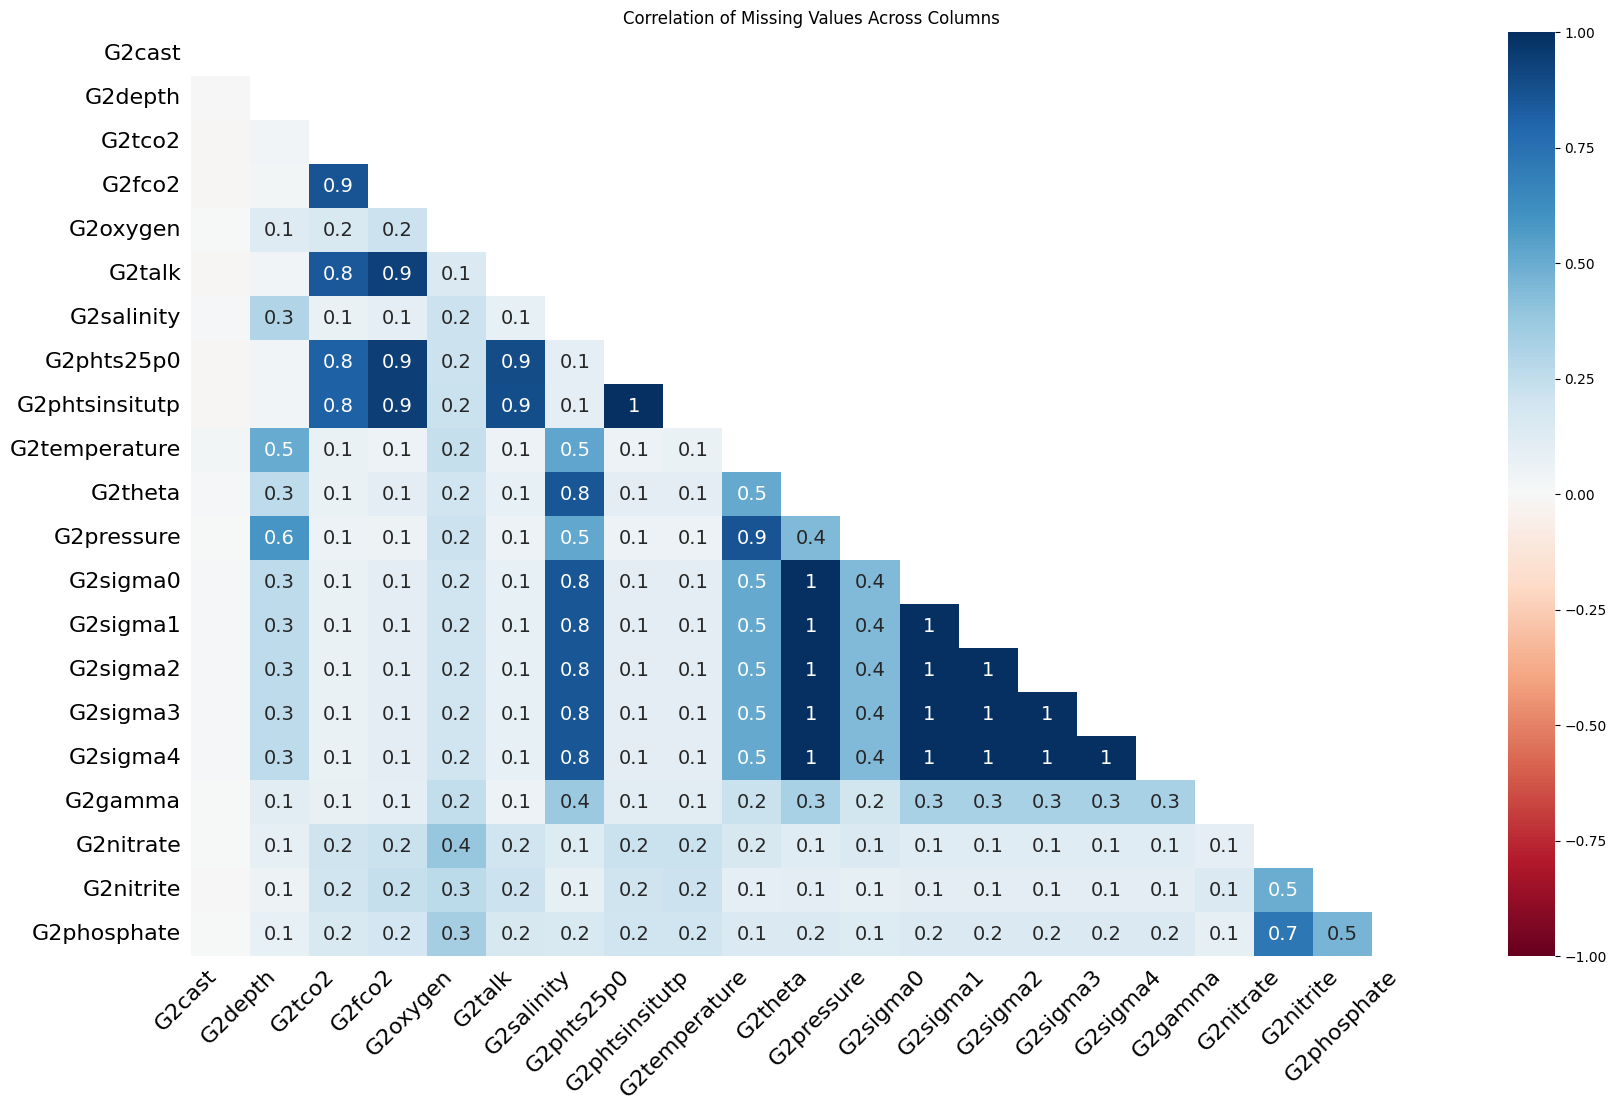

In [36]:
import missingno as msno
import matplotlib.pyplot as plt
# Heatmap (Correlation of Missing Data)
plt.figure(figsize=(20, 8))
msno.heatmap(df2)
plt.title("Correlation of Missing Values Across Columns")
plt.show()

In [37]:
import pandas as pd

def mar_correlation_analysis(df2):
    """
    Computes correlation between missingness indicators of variables with missing data
    and variables with complete data, without modifying the original DataFrame.

    Parameters:
    df2 : pandas.DataFrame
        The dataset containing missing values.

    Returns:
    corr_df2 : pandas.DataFrame
        Correlation matrix: missingness indicators vs observed variables.
    """
    # Identify variables
    missing_cols = [col for col in df2.columns if df2[col].isnull().sum() > 0]
    observed_cols = [col for col in df2.columns if df2[col].isnull().sum() == 0 and pd.api.types.is_numeric_dtype(df2[col])]

    # Create a temporary DataFrame with missingness indicators
    temp_df = pd.DataFrame(index=df2.index)
    for col in missing_cols:
        temp_df[f'{col}_missing'] = df2[col].isnull().astype(int)

    # Compute correlation matrix
    corr_results = {}
    for mcol in missing_cols:
        m_indicator = f'{mcol}_missing'
        corr = df2[observed_cols].corrwith(temp_df[m_indicator])
        corr_results[mcol] = corr

    # Combine into a DataFrame
    corr_df = pd.DataFrame(corr_results)

    # Show results
    print("\nCorrelation of missingness indicators with observed values:\n")
    print(corr_df)

    return corr_df

correlation_results = mar_correlation_analysis(df2)


Correlation of missingness indicators with observed values:

               G2cast   G2depth    G2tco2    G2fco2  G2oxygen    G2talk  \
G2cruise     0.050819  0.061899 -0.066111 -0.105815  0.021033 -0.105815   
G2station   -0.000444 -0.000991 -0.015213 -0.008616  0.064941 -0.014912   
G2region     0.005787  0.044373 -0.043705 -0.088596 -0.107163 -0.080029   
G2year       0.022004  0.058074 -0.138937 -0.198926 -0.077612 -0.187525   
G2month      0.014436  0.023146  0.043347  0.031698  0.074439  0.020215   
G2day        0.013947  0.009758  0.007272  0.006204 -0.007085  0.009267   
G2latitude   0.017430 -0.003239  0.052512  0.054641  0.108747  0.030712   
G2longitude -0.020842  0.035475  0.023604  0.009689 -0.044345  0.021245   

             G2salinity  G2phts25p0  G2phtsinsitutp  G2temperature  ...  \
G2cruise      -0.023278   -0.113227       -0.112474       0.005472  ...   
G2station     -0.003253   -0.007116       -0.007176      -0.001954  ...   
G2region      -0.029928   -0.043589  

In [38]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

columns_of_interest = [
    "G2tco2", "G2fco2", "G2oxygen", "G2talk",
    "G2salinity", "G2phts25p0", "G2phtsinsitutp"
]
df_selected = df2[columns_of_interest]

# Create masked version for validation
df_masked = df_selected.copy()
np.random.seed(0)
mask_matrix = df_masked.notnull() & (np.random.rand(*df_masked.shape) < 0.05)
df_masked[mask_matrix] = np.nan

# Save ground truth
df_ground_truth = df_selected.copy()

# MICE imputation
mice_columns = ["G2tco2", "G2fco2", "G2talk", "G2phts25p0", "G2phtsinsitutp", "G2salinity"]
mice_imputer = IterativeImputer(random_state=0, max_iter=10)
df_masked[mice_columns] = mice_imputer.fit_transform(df_masked[mice_columns])

# Simple imputation for low-missingness vars
df_masked["G2oxygen"] = df_masked["G2oxygen"].interpolate(method='linear').fillna(df_masked["G2oxygen"].median())

# Compute RMSE and Relative RMSE
def calculate_rmse(true, pred, mask):
    return np.sqrt(mean_squared_error(true[mask], pred[mask]))

rmse_results = {}
for col in columns_of_interest:
    mask = mask_matrix[col].values
    rmse = calculate_rmse(df_ground_truth[col].values, df_masked[col].values, mask)
    std_dev = df_ground_truth[col].std()
    relative_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
    rmse_results[col] = {
        'RMSE': rmse,
        'StdDev': std_dev,
        'Relative_RMSE (%)': relative_rmse
    }

rmse_df = pd.DataFrame(rmse_results).T
print("\nRMSE and Relative RMSE (% of std dev):\n")
print(rmse_df)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



RMSE and Relative RMSE (% of std dev):

                      RMSE      StdDev  Relative_RMSE (%)
G2tco2           40.262276  107.260470          37.536919
G2fco2          104.950726  448.933278          23.377801
G2oxygen         15.560919   82.743867          18.806129
G2talk           19.237873   65.086969          29.557181
G2salinity        0.936501    1.055759          88.704063
G2phts25p0        0.041537    0.185365          22.408402
G2phtsinsitutp    0.058825    0.151912          38.723094


In [39]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error

# Your columns of interest (the ones you want to keep finally)
columns_of_interest = [
    'G2expocode', 'G2cruise', 'G2station', 'G2cast', 'G2region',
    'G2year', 'G2month', 'G2day', 'G2latitude', 'G2longitude',
    'G2depth', 'G2tco2', 'G2fco2', 'G2oxygen', 'G2talk',
    'G2salinity', 'G2phts25p0', 'G2phtsinsitutp'
]

# Columns to use for imputation (includes predictors)
imputation_columns = columns_of_interest + [
    'G2temperature', 'G2theta', 'G2pressure', 'G2sigma0', 'G2sigma1',
    'G2sigma2', 'G2sigma3', 'G2sigma4', 'G2gamma',
    'G2nitrate', 'G2nitrite', 'G2phosphate'
]

# Filter out columns that are not present
imputation_columns = [col for col in imputation_columns if col in df2.columns]

# Subset the data
df_selected = df2[imputation_columns]

# Create masked version for validation
df_masked = df_selected.copy()
np.random.seed(0)
mask_matrix = df_masked[columns_of_interest].notnull() & (np.random.rand(*df_masked[columns_of_interest].shape) < 0.05)
df_masked[columns_of_interest] = df_masked[columns_of_interest].mask(mask_matrix)

# Save ground truth for RMSE calculation
df_ground_truth = df_selected[columns_of_interest].copy()

# MICE imputation
mice_columns = ['G2tco2', 'G2fco2', 'G2talk', 'G2phts25p0', 'G2phtsinsitutp']
mice_imputer = IterativeImputer(random_state=0, max_iter=10)

# Build predictor set, filter to existing columns
mice_predictors = mice_columns + [
    'G2temperature', 'G2theta', 'G2pressure', 'G2sigma0', 'G2sigma1',
    'G2sigma2', 'G2sigma3', 'G2sigma4', 'G2gamma',
    'G2nitrate', 'G2nitrite', 'G2phosphate'
]
mice_predictors = [col for col in mice_predictors if col in df_masked.columns]

# Fit imputer on all predictors
imputed_array = mice_imputer.fit_transform(df_masked[mice_predictors])

# Build a DataFrame with imputed data
imputed_df = pd.DataFrame(imputed_array, columns=mice_predictors, index=df_masked.index)

# Update only the target MICE columns in df_masked
for col in mice_columns:
    if col in imputed_df.columns:
        df_masked[col] = imputed_df[col]

# Simple imputation for low-missingness vars
df_masked['G2salinity'] = df_masked['G2salinity'].interpolate(method='linear').fillna(df_masked['G2salinity'].median())
df_masked['G2oxygen'] = df_masked['G2oxygen'].interpolate(method='linear').fillna(df_masked['G2oxygen'].median())

# Drop extra predictor columns — keep only final desired columns
df_final = df_masked[columns_of_interest]

# Compute RMSE and Relative RMSE
def calculate_rmse(true, pred, mask):
    return np.sqrt(mean_squared_error(true[mask], pred[mask]))

rmse_results = {}
for col in columns_of_interest:
    if col in ['G2tco2', 'G2fco2', 'G2oxygen', 'G2talk', 'G2salinity', 'G2phts25p0', 'G2phtsinsitutp']:
        mask = mask_matrix[col].values
        rmse = calculate_rmse(df_ground_truth[col].values, df_final[col].values, mask)
        std_dev = df_ground_truth[col].std()
        relative_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
        rmse_results[col] = {
            'RMSE': rmse,
            'StdDev': std_dev,
            'Relative_RMSE (%)': relative_rmse
        }

rmse_df = pd.DataFrame(rmse_results).T
print("\nRMSE and Relative RMSE (% of std dev):\n")
print(rmse_df)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



RMSE and Relative RMSE (% of std dev):

                     RMSE      StdDev  Relative_RMSE (%)
G2tco2          20.882412  107.260470          19.468880
G2fco2          59.829586  448.933278          13.327055
G2oxygen        15.706109   82.743867          18.981599
G2talk          17.185501   65.086969          26.403905
G2salinity       0.399405    1.055759          37.831113
G2phts25p0       0.012351    0.185365           6.663190
G2phtsinsitutp   0.012198    0.151912           8.029875


In [40]:
# Merge only columns that were actually imputed
for col in df_final.columns:
    if col in ['G2tco2', 'G2fco2', 'G2talk', 'G2phts25p0', 'G2phtsinsitutp', 'G2salinity', 'G2oxygen']:
        df2[col] = df_final[col].values

In [41]:
column_names = df2.columns.tolist()
print(column_names)

['G2expocode', 'G2cruise', 'G2station', 'G2cast', 'G2region', 'G2year', 'G2month', 'G2day', 'G2latitude', 'G2longitude', 'G2depth', 'G2tco2', 'G2fco2', 'G2oxygen', 'G2talk', 'G2salinity', 'G2phts25p0', 'G2phtsinsitutp', 'G2temperature', 'G2theta', 'G2pressure', 'G2sigma0', 'G2sigma1', 'G2sigma2', 'G2sigma3', 'G2sigma4', 'G2gamma', 'G2nitrate', 'G2nitrite', 'G2phosphate']


In [46]:
# For df2
df2_date = df2.rename(columns={
    'G2year': 'year',
    'G2month': 'month',
    'G2day':'day'
})
# Create 'date' column with only year and month
df2['Date'] = pd.to_datetime(df2_date[['year', 'month', 'day']], errors='coerce')

print(df2[['G2year', 'G2month', 'G2day', 'Date']].head())
print("\nInvalid dates in df2:", df2['Date'].isna().sum())
df2.head()

   G2year  G2month  G2day       Date
0  1984.0      7.0   20.0 1984-07-20
1  1984.0      7.0   20.0 1984-07-20
2  1984.0      7.0   20.0 1984-07-20
3  1984.0      7.0   20.0 1984-07-20
4  1984.0      7.0   20.0 1984-07-20

Invalid dates in df2: 0


,G2expocode,G2cruise,G2station,G2cast,G2region,G2year,G2month,G2day,G2latitude,G2longitude,G2depth,G2tco2,G2fco2,G2oxygen,G2talk,G2phts25p0,G2phtsinsitutp,Date
0,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,9.0,2182.262020,1132.096685,207.2,2271.429055,7.606180,7.966145,1984-07-20
1,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,9.0,2181.115695,1128.776576,207.2,2272.866388,7.608426,7.966135,1984-07-20
2,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,48.0,2204.272498,1055.951313,207.2,2307.962652,7.627522,7.958553,1984-07-20
3,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,48.0,2204.949659,1052.383804,207.2,2310.610412,7.628506,7.959465,1984-07-20
4,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,80.567,7.2267,146.0,2207.818279,1041.244957,207.2,2315.097632,7.631738,7.957546,1984-07-20


In [47]:
# Removing all columns other than necessary ones frpm the GLODAP datset
# List of columns to keep
columns_to_keep = [
    'G2expocode', 'G2cruise', 'G2station', 'G2cast', 'G2region',
    'G2year', 'G2month', 'G2day', 'Date', 'G2latitude', 'G2longitude',
    'G2depth', 'G2tco2', 'G2fco2', 'G2oxygen', 'G2talk','G2phts25p0', 'G2phtsinsitutp'
]

# Keep only those columns in the DataFrame
df2 = df2[columns_to_keep]

df2.head()

,G2expocode,G2cruise,G2station,G2cast,G2region,G2year,G2month,G2day,Date,G2latitude,G2longitude,G2depth,G2tco2,G2fco2,G2oxygen,G2talk,G2phts25p0,G2phtsinsitutp
0,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,1984-07-20,80.567,7.2267,9.0,2182.262020,1132.096685,207.2,2271.429055,7.606180,7.966145
1,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,1984-07-20,80.567,7.2267,9.0,2181.115695,1128.776576,207.2,2272.866388,7.608426,7.966135
2,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,1984-07-20,80.567,7.2267,48.0,2204.272498,1055.951313,207.2,2307.962652,7.627522,7.958553
3,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,1984-07-20,80.567,7.2267,48.0,2204.949659,1052.383804,207.2,2310.610412,7.628506,7.959465
4,06AQ19840719,1.0,319.0,1.0,4.0,1984.0,7.0,20.0,1984-07-20,80.567,7.2267,146.0,2207.818279,1041.244957,207.2,2315.097632,7.631738,7.957546


In [48]:
 missing_percent = df2.isna().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0])

Series([], dtype: float64)


In [45]:
# Drop all rows with any missing values
df2 = df2.dropna()

# Print the remaining number of rows
print(f"Number of rows remaining after dropping rows with NA: {len(df2)}")


Number of rows remaining after dropping rows with NA: 1399563


In [44]:
df2.to_csv("Glodap_cleaan.csv", index=False)

In [ ]:
# Get unique values for latitude and longitude columns from SST Datset
unique_lat_df1= df1['Latitude_Degrees'].unique()
unique_long_df1= df1['Longitude_Degrees'].unique()

print("Unique values for latitude in df1['Latitude_Degrees']:", unique_lat_df1)
print("Unique values for longitude in df1['Longitude_Degrees']:", unique_long_df1, "\n")

# Get unique values for latitude and longitude columns from Glodap Datset
unique_lat_df2= df2['G2latitude'].unique()
unique_long_df2= df2['G2longitude'].unique()

print("Unique values for latitude in df2['G2latitude']:", unique_lat_df2)
print("Unique values for longitude in df2['G2longitude']:", unique_long_df2)


In [ ]:
# Get number of unique (lat, lon) pairs from df1
num_unique_pairs_df1 = df1[['Latitude_Degrees', 'Longitude_Degrees']].drop_duplicates().shape[0]
print(f"Number of unique (lat, lon) pairs: {num_unique_pairs_df1}")

In [ ]:
# Get number of unique (lat, lon) pairs from df2
num_unique_pairs_df2 = df2[['G2latitude', 'G2longitude']].drop_duplicates().shape[0]
print(f"Number of unique (lat, lon) pairs: {num_unique_pairs_df2}")

In [ ]:
df1.head ()

In [ ]:
df2.head ()

In [ ]:
df2.columns

In [ ]:
df2[df2 ['G2latitude'] == 23.163]

In [ ]:
df2 ['G2latitude'].unique ()

In [ ]:
df2[df2 ['G2latitude'] == 80.567]

In [ ]:
df2 ['G2longitude'].unique ()

In [ ]:
df2[df2 ['G2longitude'] == 7.2267]

In [ ]:
df2 ['G2year'].unique()


In [ ]:
df1['Date_Year'].unique()

In [ ]:
import numpy as np
# Round latitude/longitude to whole numbers in both DataFrames
df1_rounded = df1[['Latitude_Degrees', 'Longitude_Degrees']].round(0).drop_duplicates()
df2_rounded = df2[['G2latitude', 'G2longitude']].round(0).drop_duplicates()

# Convert to tuples for comparison
pairs_df1 = set(df1_rounded.itertuples(index=False, name=None))
pairs_df2 = set(df2_rounded.itertuples(index=False, name=None))

# Find common pairs
common_pairs = pairs_df1 & pairs_df2

print(f"Found {len(common_pairs)} common whole-number coordinate pairs:")
for pair in common_pairs:
    print(f"Lat: {pair[0]}, Lon: {pair[1]}")

In [ ]:
missing_counts_2 = df2[['G2latitude', 'G2longitude']].isnull().sum()
print("Missing values for latitude and longitude of GLODAP datset are:\n", missing_counts_2)

In [ ]:
missing_counts_1 = df1[['Latitude_Degrees', 'Longitude_Degrees']].isnull().sum()
print("Missing values for latitude and longitude of GLODAP datset are:\n", missing_counts_1)

In [ ]:
# For numeric columns
print(df1[['Latitude_Degrees', 'Longitude_Degrees']].agg(['max', 'min']))


In [ ]:
print(df2[['G2latitude', 'G2longitude']].agg(['max', 'min']))

In [61]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare GLODAP data
glodap = df2.copy()
glodap['timestamp'] = pd.to_datetime(glodap['Date']).astype('int64') // 10**9
glodap['coords'] = list(zip(glodap['G2latitude'], glodap['G2longitude'], glodap['timestamp'], glodap['G2depth']))

# Step 2: Prepare reef data
reefs = df1_cleaned.copy()
reefs['timestamp'] = pd.to_datetime(reefs['Date']).astype('int64') // 10**9
reefs['coords'] = list(zip(reefs['Latitude_Degrees'], reefs['Longitude_Degrees'], reefs['timestamp'], reefs['Depth_m']))

# Step 3: IDW interpolation with RMSE and R² evaluation
env_columns = ['G2tco2', 'G2fco2', 'G2oxygen', 'G2talk', 'G2phts25p0', 'G2phtsinsitutp']
rmse_results = {}

for env_column in env_columns:
    glodap_valid = glodap.dropna(subset=[env_column]).copy()

    if glodap_valid.empty:
        print(f"Skipping {env_column}: no valid data in GLODAP.")
        continue

    # Mask 5% for validation
    np.random.seed(42)
    mask = np.random.rand(len(glodap_valid)) < 0.05
    glodap_valid['masked_value'] = glodap_valid[env_column]
    glodap_valid.loc[mask, env_column] = np.nan

    train_data = glodap_valid.dropna(subset=[env_column])
    X_train = np.array(train_data['coords'].tolist())
    y_train = train_data[env_column].values

    X_test = np.array(glodap_valid.loc[mask, 'coords'].tolist())
    y_test = glodap_valid.loc[mask, 'masked_value'].values

    # Fit KNN (IDW)
    knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
    knn.fit(X_train, y_train)

    # Predict for validation points
    if len(X_test) > 0:
        y_pred = knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        std_dev = np.std(y_test)
        rel_rmse = 100 * (rmse / std_dev) if std_dev > 0 else np.nan
        r2 = r2_score(y_test, y_pred)

        rmse_results[env_column] = {
            "RMSE": rmse,
            "StdDev": std_dev,
            "Relative_RMSE (%)": rel_rmse,
            "R2": r2
        }

        print(f"{env_column} | RMSE: {rmse:.4f}, Relative RMSE: {rel_rmse:.2f}%, R2: {r2:.4f}")

    # Interpolate for reef data
    X_pred = np.array(reefs['coords'].tolist())
    reefs[f'IDW_{env_column}'] = knn.predict(X_pred)

# Final RMSE + R2 table
rmse_df = pd.DataFrame(rmse_results).T
print("\nFinal RMSE + R2 Summary\n")
print(rmse_df)

# Brief output
print(reefs[['Latitude_Degrees', 'Longitude_Degrees', 'Date'] + [f'IDW_{col}' for col in env_columns]].head(10))

G2tco2 | RMSE: 31.0293, Relative RMSE: 35.43%, R2: 0.8745
G2fco2 | RMSE: 173.2288, Relative RMSE: 59.25%, R2: 0.6489
G2oxygen | RMSE: 24.7838, Relative RMSE: 29.96%, R2: 0.9103
G2talk | RMSE: 23.8294, Relative RMSE: 43.15%, R2: 0.8138
G2phts25p0 | RMSE: 0.0593, Relative RMSE: 44.36%, R2: 0.8032
G2phtsinsitutp | RMSE: 0.0614, Relative RMSE: 63.56%, R2: 0.5960

Final RMSE + R2 Summary

                      RMSE      StdDev  Relative_RMSE (%)        R2
G2tco2           31.029292   87.580025          35.429645  0.874474
G2fco2          173.228815  292.366047          59.250661  0.648936
G2oxygen         24.783776   82.727982          29.958154  0.910251
G2talk           23.829413   55.222118          43.151935  0.813791
G2phts25p0        0.059314    0.133705          44.361594  0.803205
G2phtsinsitutp    0.061442    0.096665          63.562161  0.595985
    Latitude_Degrees  Longitude_Degrees        Date   IDW_G2tco2   IDW_G2fco2  \
0             23.163           -82.5260  2005-09-15  207

In [62]:
reefs.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_Name,Country_Name,State_Island_Province_Name,...,TSA_DHWMean,Date,timestamp,coords,IDW_G2tco2,IDW_G2fco2,IDW_G2oxygen,IDW_G2talk,IDW_G2phts25p0,IDW_G2phtsinsitutp
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,Tropical Atlantic,Cuba and Cayman Islands,Cuba,Havana,...,0.18,2005-09-15,1126742400,"(23.163, -82.526, 1126742400, 10.0)",2075.020959,746.677414,203.980050,2349.410057,7.920843,7.873471
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,Society Islands,...,0.19,1991-03-15,668995200,"(-17.575, -149.7833, 668995200, 14.0)",2032.688289,622.423020,227.914535,2263.801331,7.879670,7.954727
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,British Virgin Islands,...,0.26,2006-01-15,1137283200,"(18.369, -64.564, 1137283200, 7.0)",2190.299126,1075.459237,350.194291,2287.676344,7.613828,7.977457
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,...,0.20,2006-04-15,1145059200,"(17.76, -64.568, 1145059200, 9.02)",2139.640000,850.948964,294.140000,2282.250239,7.713380,7.974664
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,...,0.25,2006-04-15,1145059200,"(17.769, -64.583, 1145059200, 12.5)",2139.640000,850.948964,294.140000,2282.250239,7.713380,7.974664


In [65]:
print(len(reefs))

32737


In [63]:
print(reefs.columns.tolist())

['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees', 'Longitude_Degrees', 'Ocean_Name', 'Realm_Name', 'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name', 'City_Town_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year', 'Depth_m', 'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 'Date', 'timestamp', 'coord

In [64]:
reefs.to_csv("Integrated_dataset_1stDraft.csv", index=False)

In [ ]:
#IDW Interpolation
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Step 1: Prepare GLODAP known data
glodap = df2.copy()
glodap['Date'] = glodap['Date'].astype(str)
glodap['timestamp'] = pd.to_datetime(glodap['Date']).astype(np.int64) // 10**9
glodap['coords'] = list(zip(glodap['G2latitude'], glodap['G2longitude'], glodap['timestamp'], glodap['G2depth']))

# Step 2: Prepare reef target data
reefs = df1.copy()
reefs['Date'] = reefs['Date'].astype(str)
reefs['timestamp'] = pd.to_datetime(reefs['Date']).astype(np.int64) // 10**9
reefs['coords'] = list(zip(reefs['Latitude_Degrees'], reefs['Longitude_Degrees'], reefs['timestamp'], reefs['Depth_m']))

# Step 3: IDW Interpolation (using KNN with inverse distance weighting)
env_columns = ['G2tco2', 'G2fco2','G2oxygen', 'G2talk', 'G2salinityf'] # environmental variables to interpolate

for env_column in env_columns:
    glodap_valid = glodap.dropna(subset=[env_column])  # Drop rows with missing values in the current column

    # Prepare coordinates and target values
    X_train = np.array(glodap_valid['coords'].tolist())
    y_train = glodap_valid[env_column].values
    X_pred = np.array(reefs['coords'].tolist())

    # Fit weighted KNN model (using 5 nearest neighbors)
    knn = KNeighborsRegressor(n_neighbors=20, weights='distance')
    knn.fit(X_train, y_train)

    # Predict interpolated values at reef locations
    interpolated_values = knn.predict(X_pred)
    reefs[f'IDW_{env_column}'] = interpolated_values

# Output: view reef location, date, and interpolated temperature
print(reefs[['Latitude_Degrees', 'Longitude_Degrees', 'Date'] + [f'IDW_{col}' for col in env_columns]].head(10))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

env_columns = ['G2tco2', 'G2fco2', 'G2oxygen', 'G2talk', 'G2salinityf']

for env_column in env_columns:
    glodap_valid = glodap.dropna(subset=[env_column])

    X = np.array(glodap_valid['coords'].tolist())
    y = glodap_valid[env_column].values  # Use one variable at a time

    # Sample data
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=10000, random_state=42)

    # Train/test split
    X_train, X_val, y_train, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    k_values = list(range(1, 1000, 1))
    rmse_scores = []

    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k, weights='distance')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, rmse_scores, marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('RMSE')
    plt.title(f'IDW Interpolation Tuning for {env_column}')
    plt.grid(True)
    plt.show()

    # Output optimal k
    best_k = k_values[np.argmin(rmse_scores)]
    print(f'Optimal k for {env_column}: {best_k}')

    # Re-fit using best k to print final accuracy metrics
    best_model = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
    best_model.fit(X_train, y_train)
    final_preds = best_model.predict(X_val)
    final_rmse = sqrt(mean_squared_error(y_val, final_preds))
    r2 = r2_score(y_val, final_preds)
    std_val = np.std(y_val)

    print(f"Final RMSE for {env_column}: {final_rmse:.4f}")
    print(f"R² Score for {env_column}: {r2:.4f}")
    print(f"RMSE / Std Dev Ratio: {final_rmse / std_val:.4f}\n")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd

env_columns = ['G2tco2', 'G2fco2', 'G2oxygen', 'G2talk', 'G2salinityf']

for env_column in env_columns:
    glodap_valid = glodap_binned.dropna(subset=[env_column])

    X = np.array(glodap_valid['coords'].tolist())
    y = glodap_valid[env_column].values

    # Sample and split
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=100000, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    std_val = np.std(y_val)
    k_values = list(range(1, 1000, 10))  # Reasonable upper limit
    metrics = []

    for k in k_values:
        model = KNeighborsRegressor(n_neighbors=k, weights='distance')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        rmse = sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)
        ratio = rmse / std_val

        metrics.append({'k': k, 'rmse': rmse, 'r2': r2, 'ratio': ratio})

    # Convert to DataFrame for analysis
    df_metrics = pd.DataFrame(metrics)

    # Optional: You can define a composite score or prioritize metrics
    df_metrics['composite_score'] = (1 - df_metrics['ratio']) + df_metrics['r2']  # You can tweak this

    # Select the best k by composite score
    best_row = df_metrics.loc[df_metrics['composite_score'].idxmax()]
    best_k = int(best_row['k'])

    # Refit and report
    best_model = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
    best_model.fit(X_train, y_train)
    final_preds = best_model.predict(X_val)
    final_rmse = sqrt(mean_squared_error(y_val, final_preds))
    r2 = r2_score(y_val, final_preds)
    final_ratio = final_rmse / std_val

    print(f"\n Results for {env_column}")
    print(f"Optimal k: {best_k}")
    print(f"Final RMSE: {final_rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE / Std Dev Ratio: {final_ratio:.4f}")

    # Plot RMSE and R²
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(df_metrics['k'], df_metrics['rmse'], label='RMSE')
    plt.xlabel('k')
    plt.ylabel('RMSE')
    plt.title(f'RMSE for {env_column}')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(df_metrics['k'], df_metrics['r2'], label='R²', color='green')
    plt.xlabel('k')
    plt.ylabel('R² Score')
    plt.title(f'R² Score for {env_column}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Copy to avoid modifying original
glodap_clean = glodap.copy()

# 1. Binning Latitude and Longitude (round to 0.5 degrees for spatial binning)
glodap_clean['lat_bin'] = glodap_clean['G2latitude'].round(1)
glodap_clean['lon_bin'] = glodap_clean['G2longitude'].round(1)

# 2. Binning Date (round to month or 30-day interval)
glodap_clean['date_bin'] = pd.to_datetime(glodap_clean['Date']).dt.to_period('M').astype(str)

# 3. Binning Depth (round to 10m or suitable resolution)
glodap_clean['depth_bin'] = glodap_clean['G2depth'].round(-1)

# 4. Define variables to average
env_columns = ['G2tco2', 'G2fco2', 'G2oxygen', 'G2talk', 'G2salinityf']

# 5. Group and aggregate (mean of environmental variables)
group_cols = ['lat_bin', 'lon_bin', 'date_bin', 'depth_bin']
glodap_binned = glodap_clean.groupby(group_cols)[env_columns].mean().reset_index()

# 6. Recreate coords for interpolation
# Convert date_bin back to timestamp for model use
glodap_binned['timestamp'] = pd.to_datetime(glodap_binned['date_bin']).astype(np.int64) // 10**9

glodap_binned['coords'] = list(zip(
    glodap_binned['lat_bin'],
    glodap_binned['lon_bin'],
    glodap_binned['timestamp'],
    glodap_binned['depth_bin']
))

# Optional: Drop rows with NaNs if any remain
glodap_binned.dropna(subset=env_columns, inplace=True)


In [ ]:
pip install pykrige

In [ ]:
import numpy as np
import pandas as pd
from pykrige.ok import OrdinaryKriging
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Variable to interpolate
env_column = 'G2tco2'

# Drop missing values for the target variable
glodap_valid = glodap.dropna(subset=[env_column])

# Extract coordinates and values
coords = np.array(glodap_valid['coords'].tolist())
values = glodap_valid[env_column].values

# Sample to reduce computational load (you can increase sample size if memory allows)
X_sample, _, y_sample, _ = train_test_split(coords, values, train_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Extract lon, lat (or x, y) components
x_train, y_train_coords = X_train[:, 0], X_train[:, 1]
x_val, y_val_coords = X_val[:, 0], X_val[:, 1]

# Fit Ordinary Kriging model
OK = OrdinaryKriging(
    x_train, y_train_coords, y_train,
    variogram_model='linear',  # Options: 'linear', 'power', 'gaussian', 'spherical', 'exponential'
    verbose=False,
    enable_plotting=False
)

# Predict on validation coordinates
z_pred, ss = OK.execute('points', x_val, y_val_coords)

# Evaluate
rmse = sqrt(mean_squared_error(y_val, z_pred))
r2 = r2_score(y_val, z_pred)
std_val = np.std(y_val)
ratio = rmse / std_val

print(f"\nKriging Interpolation Results for {env_column}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE / Std Dev Ratio: {ratio:.4f}")


In [ ]:
print(len(reefs))

In [ ]:
print(reefs.head())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


# Replace placeholder values
df2_clean = df2.replace(-9999.0, np.nan)

# Choose target and prepare data
target_variable = 'G2tco2'
columns_needed = ['G2latitude', 'G2longitude', 'G2depth', 'Date', target_variable]
glodap_valid = df2_clean.dropna(subset=columns_needed).copy()

# Add timestamp
glodap_valid['timestamp'] = pd.to_datetime(glodap_valid['Date']).astype(np.int64) // 10**9

# Create feature vectors
glodap_valid['coords'] = list(zip(
    glodap_valid['G2latitude'],
    glodap_valid['G2longitude'],
    glodap_valid['G2depth'],
    glodap_valid['timestamp']
))

# Convert to arrays
X = np.array(glodap_valid['coords'].tolist())
y = glodap_valid[target_variable].values

# Downsample for training
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=30000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Train KNN with optimized k
k = 301
model = KNeighborsRegressor(n_neighbors=k, weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# Evaluation
rmse = sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
std_val = np.std(y_val)
ratio = rmse / std_val

print(f"\nIDW Interpolation Results for {target_variable}")
print(f"Optimal k = {k}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE / Std Dev Ratio: {ratio:.4f}")
